In [38]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
wine_full = pd.read_csv('data/wine_full.csv')

In [40]:
wine_binary = wine_full.copy()

In [41]:
# make target binary 
target_mean = wine_binary.quality.mean()
wine_binary.loc[wine_binary.quality < target_mean, 'quality'] = 0
wine_binary.loc[wine_binary.quality > target_mean, 'quality'] = 1
wine_binary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.330,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.6,0
1,8.0,0.200,0.44,1.0,0.057,24.0,111.0,0.99158,3.09,0.32,11.2,1
2,7.4,0.150,0.42,1.7,0.045,49.0,154.0,0.99200,3.00,0.60,10.4,1
3,5.8,0.360,0.32,1.7,0.033,22.0,96.0,0.98980,3.03,0.38,11.2,1
4,6.4,0.170,0.34,13.4,0.044,45.0,139.0,0.99752,3.06,0.43,9.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5313,8.0,0.230,0.41,1.1,0.048,35.0,150.0,0.99168,3.09,0.47,11.2,0
5314,6.3,0.760,0.00,2.9,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1
5315,6.9,0.300,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9,0
5316,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,0


In [42]:
X = wine_binary.drop('quality', axis=1)
y = wine_binary.quality

In [43]:
# normalise
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=42, stratify=y)

In [45]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2665, 0: 1589})
Counter({1: 666, 0: 398})


<AxesSubplot:xlabel='quality', ylabel='count'>

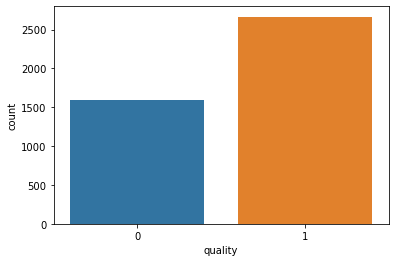

In [46]:
sns.countplot(x=y_train)

In [47]:
# for binary model
model = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(11,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.build()

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.6983 - val_loss: 0.5999 - val_accuracy: 0.6714
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7160 - val_loss: 0.5770 - val_accuracy: 0.6948
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7325 - val_loss: 0.5624 - val_accuracy: 0.7113
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7427 - val_loss: 0.5539 - val_accuracy: 0.7183
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7497 - val_loss: 0.5485 - val_accuracy: 0.7230
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7550 - val_loss: 0.5453 - val_accuracy: 0.7183
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7560 - val_loss: 0.5421 - val_accuracy: 0.7230

In [52]:
loss = history.history['loss']
accuracy = history.history['accuracy']

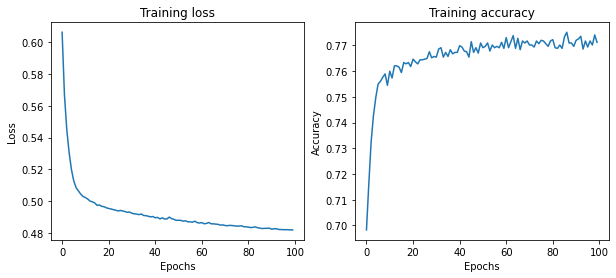

In [53]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

In [54]:
# y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
results = model.evaluate(X_test, y_test, batch_size=32)
print(results)
print(f"Accuracy on test set is {results[1]*100:.2f}%")

34/34 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.7481
[0.5165321826934814, 0.7481203079223633]
Accuracy on test set is 74.81%


In [55]:
model.save('models/model_v2.h5')
# model = keras.models.load_model('path/to/location')

In [56]:
model.evaluate(X_train, y_train)

133/133 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7689


[0.4834910035133362, 0.7689233422279358]

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       398
           1       0.79      0.81      0.80       666

    accuracy                           0.75      1064
   macro avg       0.73      0.73      0.73      1064
weighted avg       0.75      0.75      0.75      1064



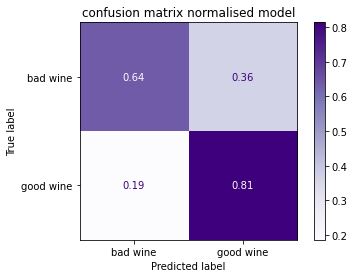

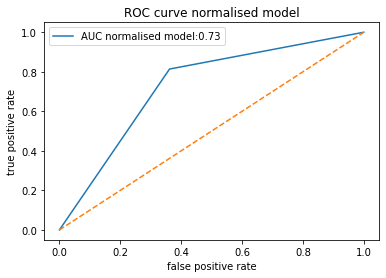

AttributeError: module 'matplotlib.pyplot' has no attribute 'labels'

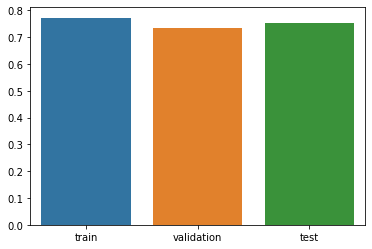

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))

labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('confusion matrix normalised model')
plt.savefig('visuals/normalised_confusionmatrix.png')
plt.show() 
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend()

roc_auc = round(roc_auc_score(y_test, y_pred), 2)
label_string = 'AUC normalised model:' + str(roc_auc)
plot_roc_curve(false_pos_rate, true_pos_rate, label=label_string)
plt.title('ROC curve normalised model')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.savefig('visuals/normalised_roccurve.png')
plt.show()

score_labels = ['train', 'validation', 'test'] #, 'f1', 'f1']
scores = [0.772, 0.732, 0.751 ]
models = ['train', 'validation', 'test']
sns.barplot(x=score_labels, y=scores)
plt.labels(scores)
plt.ylim([0,1])
plt.title('accuracies normalised model')
plt.savefig('visuals/normalised_accuracies.png')
plt.show() 


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score, precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
#     plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.plot(recalls, precisions)
    plt.legend()


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title('precision versus recall normalised model')
plt.xlabel('recall (true positive rate)')
plt.ylabel('precision')
plt.savefig('visuals/normalised_precisionrecall.png')
plt.show()